# Sentinel-3


This notebook explores working with Sentinel-3 data. 

## Sentinel-3 OLCI

https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-3-olci

The OLCI dataset provided by Sentinelhub is based on the level-1b products. These products are provided in "instrument" projection rather than being projected into a ground-based reference system. Hence, these products do not come with a 'native' reference system. The openEO layer is currently configured to use EPSG:4326 unprojected coordinates, with a resolution set to a fixed value that tries to approximate the native 300m ground resolution.


In [1]:
import openeo
c = openeo.connect("openeo.cloud")

In [ ]:
c.authenticate_oidc()

In [3]:
c.describe_collection("SENTINEL3_OLCI_L1B")

{'assets': {'thumbnail': {'href': 'https://collections.eurodatacube.com/sentinel-3-l1b-olci/sentinel-3-l1b-olci.png',
   'roles': ['thumbnail'],
   'title': 'Thumbnail',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B09',
    'B10',
    'B11',
    'B12',
    'B13',
    'B14',
    'B15',
    'B16',
    'B17',
    'B18',
    'B19',
    'B20',
    'B21',
    'dataMask']},
  't': {'extent': ['2016-04-17T11:33:13Z', None],
   'step': 'P2D',
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': 4326,
   'step': 0.00297619047619,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-85, 85],
   'reference_system': 4326,
   'step': 0.00297619047619,
   'type': 'spatial'}},
 'datasource_type': 'sentinel-3-olci',
 'description': "The [Sentinel -3](https://sentinel.esa.int/web/sentinel/missions/sentinel-3) is composed of three versatile satellites designed \nto provide data continuity for the ERS, ENVISAT and SPOT satellites and to support operational land and ocean observataion services.\nSentinel -3 satellites make use of four main instruments on board; OLCI, SLSTR, SRAL and MWR, to measure sea surface topography, \nsea and land surface temperature and ocean and land surface color.\nThe medium resolution OLCI(Ocean and Land Colour Instrument) is the successor to ENVISAT's MERIS instrument. \nSince its launch in 2016, OLCI acquires data of the entire globe atleast every 2 days, in 21 bands, from which information on marine and terrestrial biomass can be derived. \nOLCI also provides reliable information on the atmosphere, especially on the aerosols characterisation.\nLevel 1B data provides calibrated, ortho-geolocated and spatially re-sampled Top Of Atmosphere (TOA) radiances for the 21 OLCI spectral bands.\n",
 'extent': {'spatial': {'bbox': [[-180, -85, 180, 85]]},
  'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
 'id': 'SENTINEL3_OLCI_L1B',
 'keywords': ['sentinel hub',
  'xcube',
  'raster',
  'systematic',
  'satellite imagery',
  'multi spectral imagery',
  'climate',
  'atmospheric aerosols',
  'marine biology',
  'maritime monitoring',
  'OTCI',
  'open data',
  'race challenges',
  'copernicus',
  'sentinel'],
 'license': 'proprietary',
 'links': [{'href': 'https://collections.eurodatacube.com/stac/sentinel-3-l1b-olci.json',
   'rel': 'self'},
  {'evalscript_url': 'https://custom-scripts.sentinel-hub.com/sentinel-3/enhanced_true_color-2/script.js',
   'href': 'https://docs.sentinel-hub.com/api/latest/api/process/',
   'layer_name': 'True color - enhanced',
   'mosaicking_order': 'mostRecent',
   'rel': 'processing-expression',
   'upsampling': 'BICUBIC'},
  {'evalscript_url': 'https://custom-scripts.sentinel-hub.com/sentinel-3/true_color_highlight_optimized/script.js',
   'href': 'https://docs.sentinel-hub.com/api/latest/api/process/',
   'layer_name': 'True color - highlight optimized',
   'mosaicking_order': 'mostRecent',
   'rel': 'processing-expression',
   'upsampling': 'BICUBIC'},
  {'evalscript_url': 'https://custom-scripts.sentinel-hub.com/sentinel-3/otci/script.js',
   'href': 'https://docs.sentinel-hub.com/api/latest/api/process/',
   'layer_name': 'OTCI',
   'mosaicking_order': 'mostRecent',
   'rel': 'processing-expression',
   'upsampling': 'NEAREST'},
  {'evalscript_url': 'https://custom-scripts.sentinel-hub.com/sentinel-3/tristimulus/script.js',
   'href': 'https://docs.sentinel-hub.com/api/latest/api/process/',
   'layer_name': 'Tristimulus',
   'mosaicking_order': 'mostRecent',
   'rel': 'processing-expression',
   'upsampling': 'NEAREST'},
  {'href': 'https://docs.sentinel-hub.com/api/latest/data/sentinel-1-grd/#attribution-and-use',
   'rel': 'license'}],
 'providers': [{'description': 'Global since May 2016',
   'name': 'Sentinel Hub',
   'roles': ['processor'],
   'url': 'creodias.sentinel-hub.com'},
  {'description': 'G

In [5]:

bbox = {"west":27.564697,"south":34.764179,"east":33.002930,"north":37.387617}
sentinel3 = c.load_collection("SENTINEL3_OLCI_L1B",spatial_extent=bbox,temporal_extent=["2021-07-30","2021-07-30"],bands=["B08","B06","B04"])

In [6]:
sentinel3.download("sentinel3.tiff")

In [7]:
!ls -lh sentinel3.tiff

-rw-r--r--. 1 driesj eodata 11M Dec 17 10:35 sentinel3.tiff


In [8]:
!gdalinfo -hist sentinel3.tiff

Driver: GTiff/GeoTIFF
Files: sentinel3.tiff
       sentinel3.tiff.aux.xml
Size is 1828, 882
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (27.564696999999999,37.387616999999999)
Pixel Size = (0.002976190476190,-0.002976190476190)
Metadata:
  AREA_OR_POINT=Area
  PROCESSING_SOFTWARE=0.6.1a1
Image Structure Metadata:
  COMPRESSION=DEFLATE
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  27.5646970,  37.3876170) ( 27d33'52.91"E, 37d23'15.42"N)
Lower Left  (  27.5646970,  34.7626170) ( 27d33'52.91"E, 34d45'45.42"N)
Upper Right (  33.0051732,  37.3876170) ( 33d 0'18.62"E, 37d23'15.42"N)
Lower Right (  33.0051732,  34.7626170) ( 33d 0'18.62"E, 34d45'45.42"N)
Center      (  30.2849351,  36.0751170) ( 30d17' 5.77"E, 36d 4'30.42"N)
Band 1 Block=256x256

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


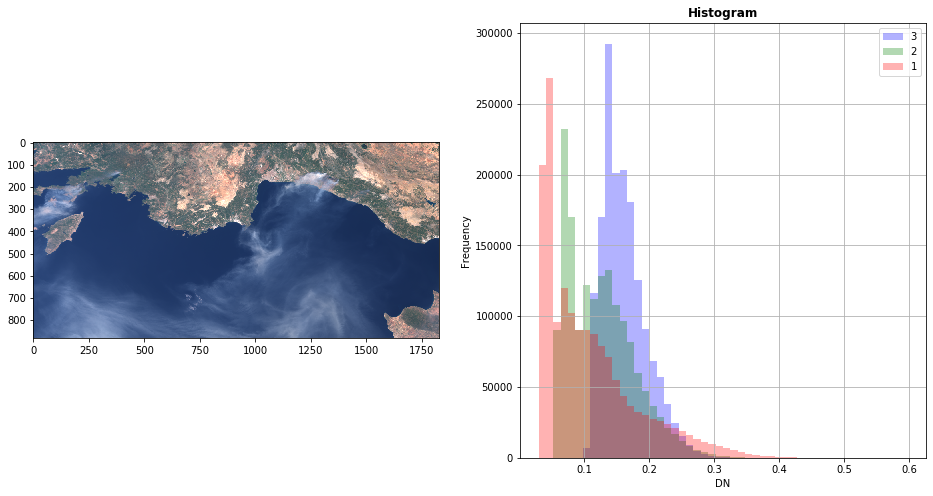

In [9]:
from rasterio.plot import show,show_hist
import rasterio
from matplotlib import pyplot
src = rasterio.open("sentinel3.tiff")
olci_data = src.read()
fig, (axrgb, axhist) = pyplot.subplots(1,2, figsize=(16, 8))
show(3*olci_data,ax=axrgb)
show_hist(src, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, ax=axhist)